In [1]:
import csv
import cv2
import numpy as np
import os
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

print(os.getcwd())

#file = (r'C:\Users\Ale\Desktop\Self Driving Car\03BehaviouralCloning\data')
#dir_path = os.path.dirname(os.path.realpath(file))

C:\Users\resta\Desktop\SelfDrivingCarNanodegree\03BehaviouralCloning\CarND-Behavioral-Cloning-P3


#### plot an example image

<function matplotlib.pyplot.show>

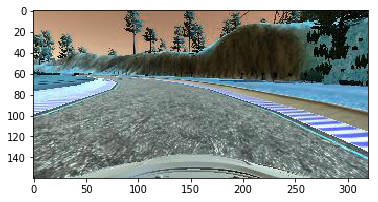

In [2]:
leg = cv2.imread(r'C:\Users\resta\Desktop\SelfDrivingCarNanodegree\03BehaviouralCloning\CarND-Behavioral-Cloning-P3\IMG\center_2018_01_27_12_28_50_331.jpg')
plt.imshow(leg)
plt.show

### Collecting images

In [3]:
lines = []
with open('driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []
for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('/')[-1]
        current_path = filename
        #print(current_path)
        #clean_string = ''.join(current_path.split())
        #print(clean_string)
        image = cv2.imread(current_path)
        #print(image)
        images.append(image)
        measurement = float(line[3])
        if i==1:
            measurement = measurement + 0.2
        if i==2:
            measurement = measurement - 0.2
        else:
            measurement = measurement
        measurements.append(measurement)

In [4]:
print(len(lines))
print(len(images))
print(len(measurements))

7250
21750
21750


### Deleting 80% of the data with steering angle equal to: 0.2, 0 and -0.2

In [15]:
zero=0
zeros=[]
remain=[]
p=0
toomuch=[-0.2,0,0.2]
for i in range (0,len(images)):
    if measurements[i] in toomuch:
        zero=zero+1
        if zero%5==0:
            remain.append(i)
        else:
            zeros.append(i)
        
for index in range (0,len(zeros)-p):
    #np.delete(images,(zeros[index]-p))
    #np.delete()
    images.pop(zeros[index]-p)
    measurements.pop(zeros[index]-p)
    p=p+1
    
len(images)

13657

### Plot distribution measurements

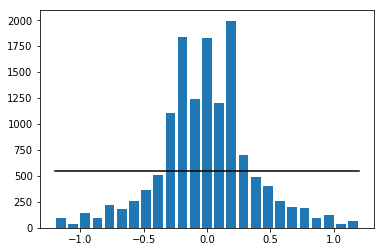

In [16]:
num_bins = 25
avg_samples_per_bin = len(measurements)/num_bins
hist, bins = np.histogram(measurements, num_bins)
center = (bins[:-1] + bins[1:]) / 2
width = 0.8*(bins[1] - bins[0])
# print histogram again to show more even distribution of steering angles
hist, bins = np.histogram(measurements, num_bins)
plt.bar(center, hist, align='center', width=width)
plt.plot((np.min(measurements), np.max(measurements)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')
plt.show()


### Augmenting images

In [18]:
augmented_images, augmented_measurements=[], []
for image, measurement in zip(images,measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)
    
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

In [19]:
print(X_train.shape)
print(y_train.shape)

(27314, 160, 320, 3)
(27314,)


#### Example of a flipped image

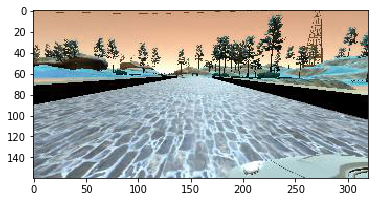

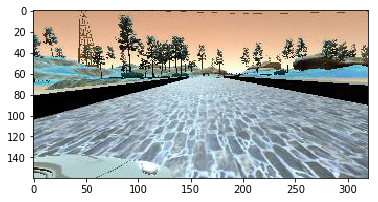

In [21]:
plt.imshow(images[13656])
plt.show()
plt.imshow(augmented_images[27313])
plt.show()

# Final model

In [117]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Flatten())
model.add(Dropout(0.75, noise_shape=None, seed=None))
model.add(Dense(100))
model.add(Dropout(0.75, noise_shape=None, seed=None))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=3)



model.save('model.h5')
print("model saved")

Train on 21851 samples, validate on 5463 samples
Epoch 1/3
21851/21851 [==============================] - 228s - loss: 0.0901 - val_loss: 0.0120
Epoch 2/3
21851/21851 [==============================] - 232s - loss: 0.0698 - val_loss: 0.0133
Epoch 3/3
21851/21851 [==============================] - 218s - loss: 0.0636 - val_loss: 0.0176
model saved
